In [48]:

from Services.DataService.DataService import DataService
import matplotlib.pyplot as plt
import seaborn as sns
#from Services.Plots.Plots import Plots


In [2]:

dataService = DataService()
#plots = Plots()


In [3]:

records = dataService.getRecordsAsPandasLocal()


In [4]:

records


,names,locations,types
0,WRLD-Kick-1-D.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK
1,WRLD-Kick-3-G.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK
2,WRLD-Kick-5-A.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK
3,WRLD-Kick-2-F.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK
4,WRLD-Kick-6-B.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK
5,WRLD-Kick-4-G.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK


In [5]:

rate, data = dataService.getSampleFromLocalLocation(records['locations'][0])


In [23]:

test = dataService.getSampleFromLocalLocation(records['locations'][0])


(44100, array([[ 558,  559],
        [  20,   20],
        [1842, 1845],
        ...,
        [   0,    0],
        [   0,    0],
        [   0,    0]], dtype=int16))

Full file
First second
First 500 hz


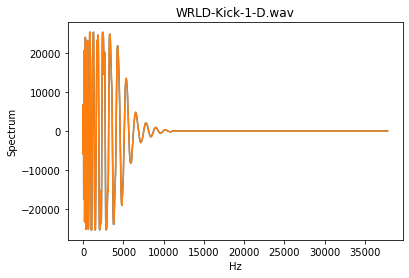

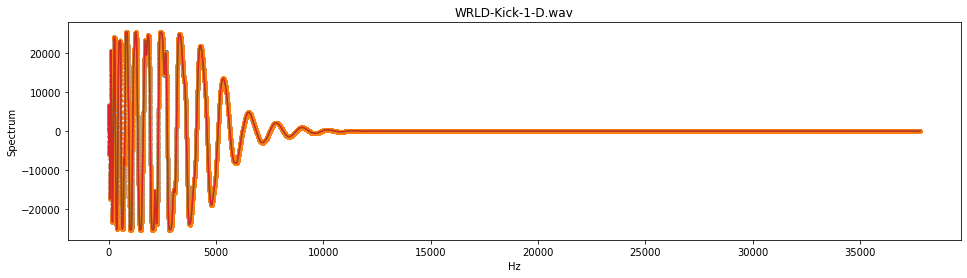

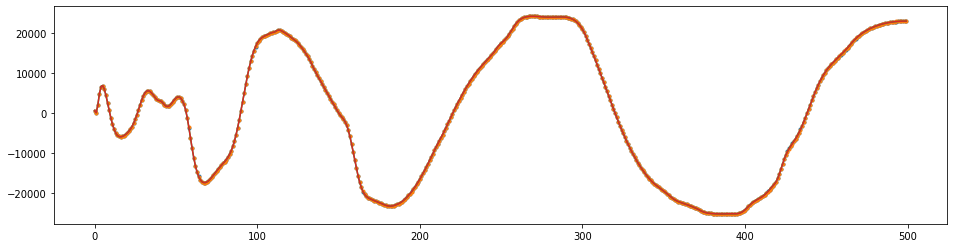

In [21]:

def plot_audio(data, name):
    plt.title(name)
    plt.xlabel('Hz')
    plt.ylabel('Spectrum')
    plt.plot(data, '-')

def plot_audio_ext(data,name, hz):
    plt.title(name)
    plt.xlabel('Hz')
    plt.ylabel('Spectrum')
    plt.figure(figsize=(16, 4))
    plt.plot(data[:hz], '.'); plt.plot(data[:hz], '-')

print('Full file')
plot_audio(data, records['names'][0])
print('First second')
plot_audio_ext(data,records['names'][0], 44100)
print('First 500 hz')
plot_audio_ext(data,records['names'][0], 500)

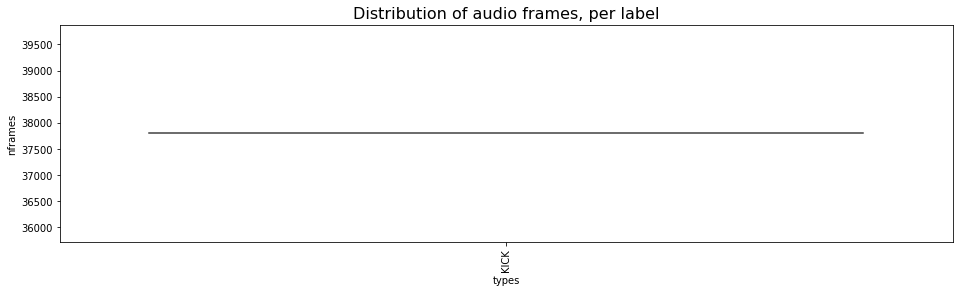

In [38]:

tup_list = records['locations'].apply((lambda f: dataService.getSampleFromLocalLocation(f)))
tup_list = tup_list.apply(lambda  f: f[1])
tup_list = tup_list.apply(lambda  f: f.shape[0])

records['nframes'] = tup_list 

_, ax = plt.subplots(figsize=(16, 4))
sns.violinplot(ax=ax, x="types", y="nframes", data=records)
plt.xticks(rotation=90)
plt.title('Distribution of audio frames, per label', fontsize=16)
plt.show()



In [28]:

records = records.drop(['nframes'], axis=1)


In [37]:

records


,names,locations,types,nframes
0,WRLD-Kick-1-D.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK,37800
1,WRLD-Kick-3-G.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK,37800
2,WRLD-Kick-5-A.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK,37800
3,WRLD-Kick-2-F.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK,37800
4,WRLD-Kick-6-B.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK,37800
5,WRLD-Kick-4-G.wav,/Users/vilhjamurr.vilhjalmsson/Desktop/Project...,KICK,37800


### Librosa


In [40]:
import librosa


In [41]:
SAMPLE_RATE = 44100
f_location = records['locations'][0]   # Hi-hat
wav, _ = librosa.core.load(f_location, sr=SAMPLE_RATE)
wav = wav[:2*44100]


In [42]:
mfcc = librosa.feature.mfcc(wav, sr = SAMPLE_RATE, n_mfcc=40)
mfcc.shape

(40, 74)

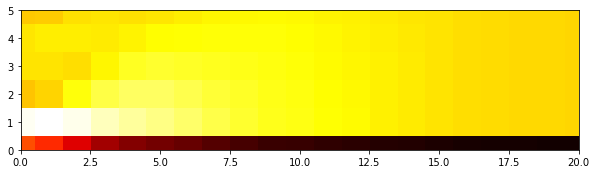

In [45]:

def plot_sound_heat(wave):
    plt.figure(figsize=(10,10))
    axes = plt.gca()
    axes.set_xlim([0, 20])
    axes.set_ylim([0, 5])
    plt.imshow(wave, cmap='hot', interpolation='nearest')
    
plot_sound_heat(mfcc)
